In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [4]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv", names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','target'], skiprows=1)

In [5]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
X = df.iloc[:,:4].values
y = df.iloc[:,-1].values

In [7]:
perm = np.random.permutation(len(X))
f= df.loc[perm]
x_train, x_test = X[perm][30:], X[perm][:30]
y_train, y_test = y[perm][30:], y[perm][:30]

In [8]:
# Train the model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [9]:
# Test the model
predictions = log_reg.predict(x_test)
print(predictions)# printing predictions
print()# Printing new line

['Virginica' 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor'
 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica'
 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Setosa' 'Virginica'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Setosa' 'Virginica']



In [10]:
print(classification_report(y_test, predictions) )
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


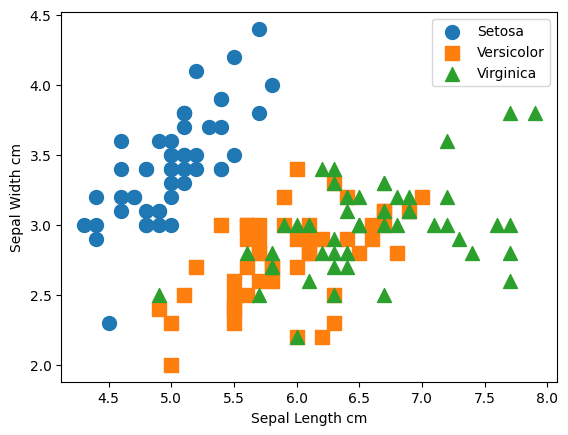

In [11]:
marker_map = ['o', 's', '^']
unique = np.unique(df['target'])
for marker, val in zip(marker_map, unique):
    toUse = (df['target'] == val)
    plt.scatter(X[toUse,0], X[toUse,1], marker=marker, label=val, s=100)
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend()
plt.show()

In [12]:
df['target']=='Versicolor'

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

[[-1.3983599  -3.91315269]] [10.48150545]


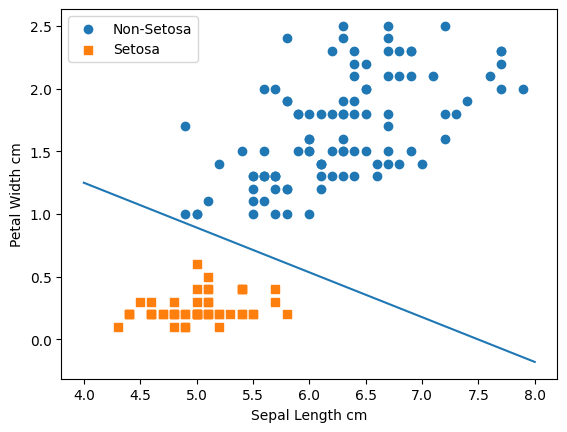

In [13]:
marker_map = ['o', 's', 's']
df.loc[((df['target']=='Versicolor') | (df['target']=='Virginica')), 'target']='Non-Setosa'
unique = np.unique(df['target'])

for marker, val in zip(marker_map, unique):
    toUse = (df['target'] == val)
    plt.scatter(X[toUse,0], X[toUse,3], marker=marker, label=val)
plt.xlabel('Sepal Length cm')
plt.ylabel('Petal Width cm')
plt.legend()


log_reg.fit(np.hstack((X[:,0].reshape(-1, 1), X[:,3].reshape(-1, 1))),df['target'].map({'Setosa':1,'Non-Setosa':0}).values)

print(log_reg.coef_, log_reg.intercept_)


m1 = log_reg.coef_[0][0]
m2 = log_reg.coef_[0][1]
m0 = log_reg.intercept_

# Generate x1 values
x1_values = np.linspace(4, 8, 150)

# Calculate corresponding x2 values using the equation m1x1 + m2x2 + m0 = 0
x2_values = (-m1 * x1_values - m0) / m2

# Plot the line
plt.plot(x1_values, x2_values)

plt.show()

[[ 1.72135554 -3.98236256]] [-2.23481392]


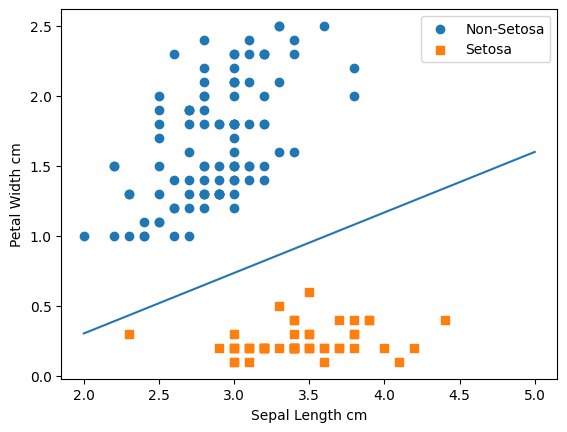

In [14]:
marker_map = ['o', 's', 's']
unique = np.unique(df['target'])
for marker, val in zip(marker_map, unique):
    toUse = (df['target'] == val)
    plt.scatter(X[toUse,1], X[toUse,3], marker=marker, label=val)
plt.xlabel('Sepal Length cm')
plt.ylabel('Petal Width cm')
plt.legend()

log_reg.fit(np.hstack((X[:,1].reshape(-1, 1), X[:,3].reshape(-1, 1))),df['target'].map({'Setosa':1,'Non-Setosa':0}).values)

print(log_reg.coef_, log_reg.intercept_)


m1 = log_reg.coef_[0][0]
m2 = log_reg.coef_[0][1]
m0 = log_reg.intercept_

# Generate x1 values
x1_values = np.linspace(2, 5, 150)

# Calculate corresponding x2 values using the equation m1x1 + m2x2 + m0 = 0
x2_values = (-m1 * x1_values - m0) / m2

# Plot the line
plt.plot(x1_values, x2_values)

plt.show()